<a href="https://colab.research.google.com/github/virb30/data_science/blob/master/notebooks/Manipula%C3%A7%C3%A3o_imagens_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipulação de Imagens com OpenCV

Este notebook tem como objetivo demonstrar algumas técnicas de manipulação e criação de imagens - redimensionar, cortar, rotacionar, transladar, aplicar filtros e máscaras - utilizando Python e a biblioteca OpenCV.

O OpenCV é uma biblioteca *open-source* de visão computacional, multiplataforma e otimizada para aplicações em tempo real.

In [5]:
# importar as bibliotecas
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

### Ler um arquivo de imagem

Primeiro carregamos uma imagem e exibimos para garantir que foi carregada corretamente.



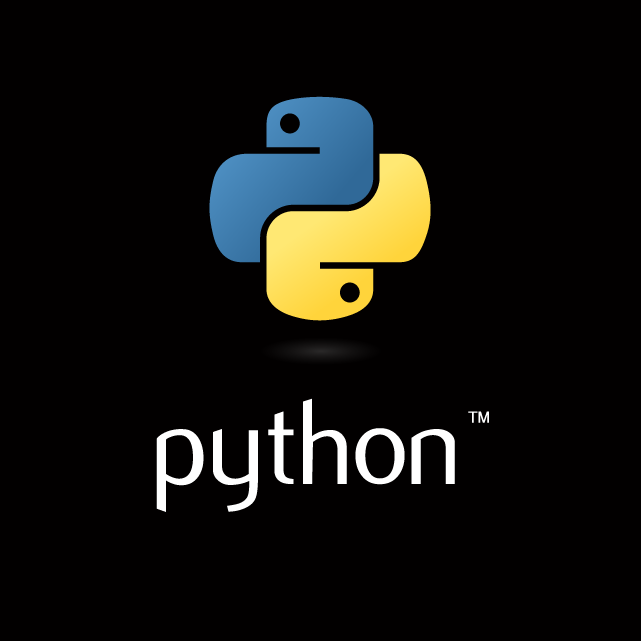

In [6]:
# ler um arquivo
image = cv2.imread("/content/python.png")
cv2_imshow(image)

Utilizando o comando `shape` podemos visualizar suas dimensões no formato `(a, l, c)` onde:
- `a`: altura da imagem (em pixels)
- `l`: largura da imagem (em pixels)
- `c`: quantidade de canais (se omitido significa 1 canal - escala de cinza)

In [7]:
image.shape

(641, 641, 3)

### Criar uma imagem

Também é possível criarmos imagens do zero. Se lembrarmos uma imagem é como uma matriz de números - no intervalo de 0 a 255. Podemos então criar um array com o Numpy que poderá ser representado como uma imagem.

No exemplo abaixo criamos uma imagem de 81x81 completamente preta utilizando o comando `np.zeros`. Como 0 significa "ausência de cor" todos os pixels são representados com a cor preta.

Como segundo parâmetro da função informamos ao numpy que queremos criar todos os elementos do array com o tipo `uint8` para atingirmos o resultado esperado.

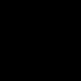

In [8]:
# criar uma imagem
scratch_image = np.zeros((81,81), dtype=np.uint8)
cv2_imshow(scratch_image)

### Desenhar por cima da imagem

Assim como conseguimos criar imagens do zero, podemos utilizar o recurso de ***slicing*** dos arrays para "pintar" intervalos de pixels de outras cores.

No exemplo iremos alterar o valor de alguns pixels para 255, que resultara em seções em brancas na imagem.

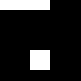

In [9]:
# desenhar
scratch_image[0:10, 0:50] = 255
scratch_image[50:70, 30:50] = 255

cv2_imshow(scratch_image)

In [10]:
# ver dimensões
scratch_image.shape

(81, 81)

### Converter uma imagem para BGR

Por padrão o OpenCV utiliza a escala RGB ao contrário, por isso chamaos de BGR. A imagem que criamos anteriormente possui apenas um canal, conforme podemos ver no resultado do comando `scratch_image.shape`.

Para fazer conversões, precisamos buscar dentro do OpenCV o esquema de cores que queremos converter.

Como exemplo, vamos converter nossa imagem o formato BGR. Podemos ver que o `shape` da nossa imagem passou de `(81,81)` para `(81,81,3)`

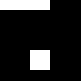

(81, 81, 3)


In [11]:
# converter imagem de escala de cinza (1 canal) para BGR (3 canais)
scratch_image_bgr = cv2.cvtColor(scratch_image, cv2.COLOR_GRAY2BGR)
cv2_imshow(scratch_image_bgr)
print(scratch_image_bgr.shape)

### Converter o formato da foto (PNG <-> JPG)

Além de converter o esquema de cores da imagem, podemos alterar seu formato, no OpenCV é tão simples quanto renomear o arquivo, como ele reconhece diversos formatos, precisamos apenas utilizar o comando `imwrite` para salvar um arquivo com seu novo formato.

In [12]:
cv2.imwrite('foto_nova.jpg', image)

True

### Carregar imagem em grayscale

Por padrão, o OpenCV carrega imagens utilizando os 3 canais (BGR), mesmo que o arquivo tenha sido criado e salvo com um único canal (escala de cinza).

No entanto conseguimos abrir a imagem em outros formatos de cor informando no segundo parâmetro no método `imread`.

In [13]:
# carregar imagem grayscale com 1 único canal
teste = cv2.imread("/content/python.png", cv2.IMREAD_GRAYSCALE)
print(teste.shape)

(641, 641)


### Modos do `cv2.imread`

- cv2.IMREAD_COLOR
  - 3 canais de cores (BGR), com valores de 8-bit (0-255)
- cv2.IMREAD_GRAYSCALE
  - escala de cinza de 8-bit (1 canal)
- cv2.IMREAD_ANYCOLOR
  - Dependente do metadado da imagem. Pode retornar 8-bit por canal BGR ou 8-bit grayscale
- cv2.IMREAD_UNCHANGED
  - Lê todos os dados da imagem, incluindo o canal alpha, se existir
- cv2.IMREAD_REDUCED_GRAYSCALE_2 / 4 / 8
  - Carrega uma imagem na metade da resolução original, em grayscale
- cv2.IMREAD_REDUCED_COLOR_2 / 4 / 8
  - Carrega uma imagem na metade da resolução original, em BGR.


### Separando (*splitting*) e Agrupando (*merging*) canais

Também conseguimos separar e unir os canais de uma imagem. Essa funcionalidade é útil quando precisamos manipular, ou aplicar filtros em apenas um canal da imagem.

In [14]:
# split channels
(b, g, r) = cv2.split(image)

In [15]:
# merge channels
image_copy = cv2.merge((b,g,r))

### Transformações Geométricas

Em visão computaciona, as vezes, precisamos redimensionar e cortar imagens. Podemos essas e outras transformações com alguns comandos:


#### Escala

A primeira transformação será a escala. Com ela conseguimos aumentar ou diminuir alguma ou ambas as dimensões da imagem.

Conseguimos realizar essa manipulação tanto com valores absolutos quanto com valores relativos.

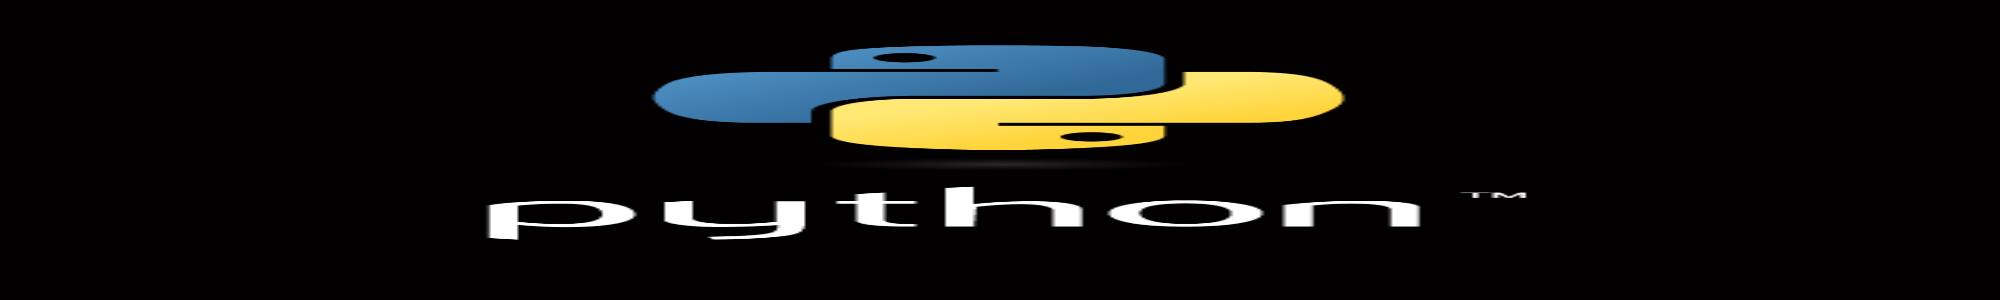

In [16]:
# valores absolutos
resized_image = cv2.resize(image, (2000, 300), interpolation=cv2.INTER_LINEAR)
cv2_imshow(resized_image)

Também conseguimos reduzi-la mantendo suas proporções

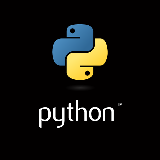

In [17]:
# ratio
dst_image = cv2.resize(image, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_CUBIC)
cv2_imshow(dst_image)

Nesse notebook, não entraremos em detalhes sobre interpolação, mais informações podem ser obtidas nesse <a href="https://www.cambridgeincolour.com/tutorials/image-interpolation.htm">link</a>.

Como dica geral podemos utilizar:

* **Interpolação**
  * Aumentar a imagem
    * Geralmente, a melhor abordagem é `cv2.INTER_CUBIC` ou `cv2.INTER_LINEAR`
  * Diminuir a imagem
    * Geralmente, a melhor abordagem é user `cv2.INTER_LINEAR`

**BÔNUS:** Carregar imagem Reduzida

Caso necessário conseguimos já carregar uma imagem em tamanho reduzido com fatores redução de 2, 4 ou 8. Basta informar no segundo parâmetro da função `imread`

(320, 320, 3)


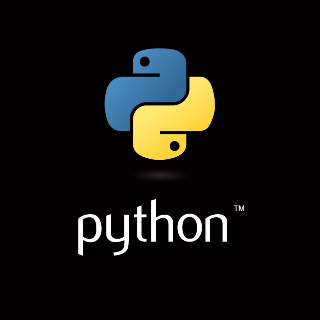

In [36]:
reduced_image = cv2.imread('/content/python.png', cv2.IMREAD_REDUCED_COLOR_2)
print(reduced_image.shape)
cv2_imshow(reduced_image)

#### Translação


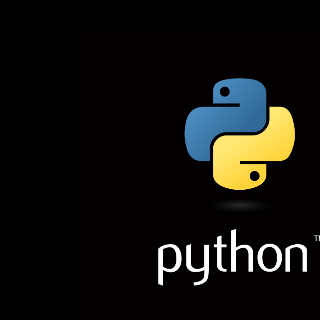

In [37]:
height, width = reduced_image.shape[:2]

M = np.float32([[1, 0, 80],
                [0, 1, 30]])

translated_image = cv2.warpAffine(reduced_image, M, (width, height))
cv2_imshow(translated_image)

#### Rotação

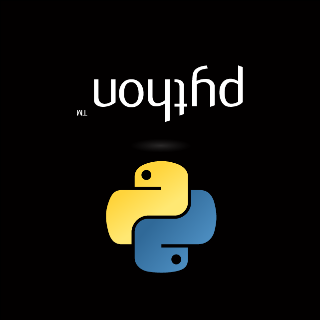

In [38]:
# Rotação
M = cv2.getRotationMatrix2D((width/2.0, height/2.0), 180, 1)
rotated_image = cv2.warpAffine(reduced_image, M, (width, height))
cv2_imshow(rotated_image)

#### Cortar (Crop) imagem

Para cortar uma imagem, utilizamos a mesma técnica de *slicing* citada anteriormente

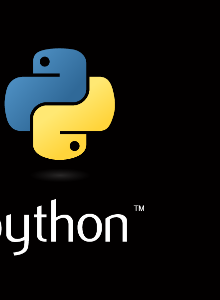

In [39]:
cropped_image = reduced_image[0:300, 100:400, :]
cv2_imshow(cropped_image)

### Filtro e Operações Aritméticas

O filtro na verdade é uma pequena matriz que usamos para deixar a imagem mais nítida ou borrada. Para fazer isso, precisamos fazer uma operação de convolução.

Por exemplo, temos uma matriz de 6x6 pixels que repesenta nossa imagem. O próximo passo é fazer uma operação de convolução com filtro 3x3. O produto final desse processo de convolução será uma matriz 4x4. Nós calculamos os elementos da matriz inicial (imagem) e pegamos o produto de cada elemento correspondente e os juntamos, como você pode ver abaixo.

<p align="center"><img src="http://media5.datahacker.rs/2018/10/multiplication_obojeno_new-1024x370.png" width="60%"></p>

<p align="center"><img src="https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif" width="30%"></p>

Após avaliar a e expressão acima nós obtemos o resultado de -5. Esse será o valor do pixel naquela posição na nossa imagem com o filtro aplicado. O filtro é, então, aplicado ao longo da imagem, criando a imagem pronta.

Um filtro sempre será uma matriz com a mesma altura e largura (3×3, 5×5, 9×9). Como precisamos de um pixel no centro da matriz, sempre utilizamos números ímpares.

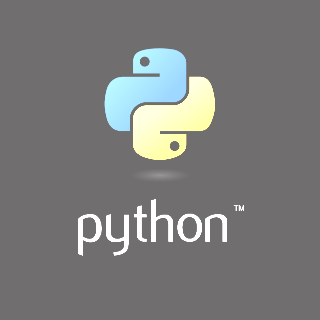

In [40]:
# utilizando o ones do numpy para criar o filtro
filter_1 = np.ones(reduced_image.shape, dtype=np.uint8) * 110
# clarear
sum = cv2.add(reduced_image, filter_1)
cv2_imshow(sum)

Nesse filtro aumentamos o brilho da imagem ao aumentar o valor de todos os pixels em 110.

Para escurecer, utilizamos a operação contrária.

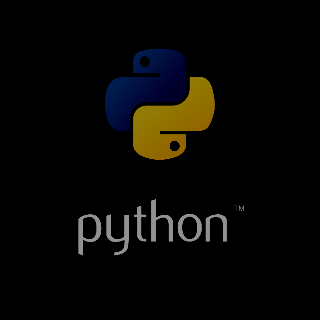

In [41]:
# para escurecer
sub = cv2.subtract(reduced_image, filter_1)
cv2_imshow(sub)

#### Blurring
Nas operações anteriores, tratamos apenas de um canal, no entanto, quando lidamos com imagens, é comum utilizarmos o padrão **RGB**. Por isso, precisamos de outra forma de lidar com essas imagens.

O filtro de blurring pode ser usado, entre outras, para: detectar bordas, reduzir ruído, omitir alguma informação

Quando pensamos em canais como sendo uma "visão" da imagem como um todo, dando ênfase ou escondendo determinadas partes de acordo com as características de cada canal.

<p align="center"><img src="https://miro.medium.com/max/1000/1*k8P28Ayl-5hOqIMSv-qosw.jpeg" width="70%"></p>

Por isso, uma distinção de termos se faz chave aqui: quando falamos de 1 canal, os termos filtro e kernel são praticamente intercambiáveis, mas em geral, quando falamos de mais canais, eles são bem diferentes. 

Cada filtro, na verdade, é uma coleção de kernels, havendo um kernel para cada canal de input para a camada, e cada kernel sendo único. Cada filtro em uma camada convolucional produz um e apenas um canal de output, e eles o fazem assim:

<p align="center"><img src="https://miro.medium.com/max/1000/1*8dx6nxpUh2JqvYWPadTwMQ.gif" width="70%"></p>

Cada um dos kernels do filtro "anda" por cima de seu respectivo canal de input, produzindo uma versão processada de cada um. É importante lembrar que alguns kernels podem ter pesos mais fortes que outros, o que resultaria em ênfases em determinados canais, ou um canal ser mais sensível a mudanças que outros.

<p align="center"><img src="https://miro.medium.com/max/1000/1*CYB2dyR3EhFs1xNLK8ewiA.gif" width="70%"></p>

Então, cada uma das versões processadas por cada canal são somadas, formando um canal único. Os kernels de um filtro produzem uma versão para cada canal, e o filtro, como um todo, produz um canal como output.

<p align="center"><img src="https://miro.medium.com/max/294/1*RYYucIh3U-YFxrIkyQKzRw.gif" width="30%"></p>

Por fim, temos um *bias*, ou um viés, peso. A forma que o *bias* funciona é que cada output de filtro possui um viés. Esse viés é adicionado ao canal obtido como output até agora e produz o output final do canal.

Portanto, quando falamos em qualquer número de filtros, a forma de trabalho será idêntica: Cada filtro processa o input por si só, juntamos diferentes conjuntos de kernels com um viés através do processo descrito acima, produzindo um canal de output único. Então, eles são concatenados para produzir um output geral final, com o número de canais sendo o número de filtros. Normalmente, também é aplicada uma não-linearidade passando esse input por outra camada de convolução, o que repete o processo.


A literatura possui diversos kernels e filtros arbitrários, que após longa pesquisa concluiu-se que são eficientes para determinada tarefa.

In [42]:
# # kernels arbitrários
# kernel = np.array([[1/9, 1/9, 1/9],
#                    [1/9, 1/9, 1/9],
#                    [1/9, 1/9, 1/9]])

# kernel_image = cv2.filter2D(image, -1, kernel)

# cv2_imshow(kernel_image)

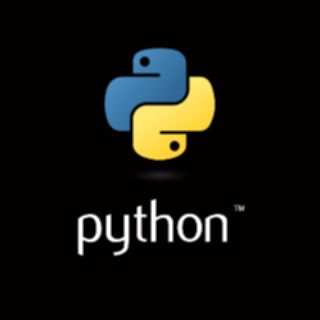

In [43]:
# criando o kernel
kernel_blur = np.ones((3, 3), np.float32) / 9

# aplicando o filtro
blurred = cv2.filter2D(reduced_image, -1, kernel_blur)

# mostranto a imagem com filtro
cv2_imshow(blurred)

Aqui, podemos ver o resultado do filtro, que foi utilizado para embaçar a imagem.

Também podemos aumentar a "força" desse efeito, mudando o parâmetro pelo qual a matriz é dividida.

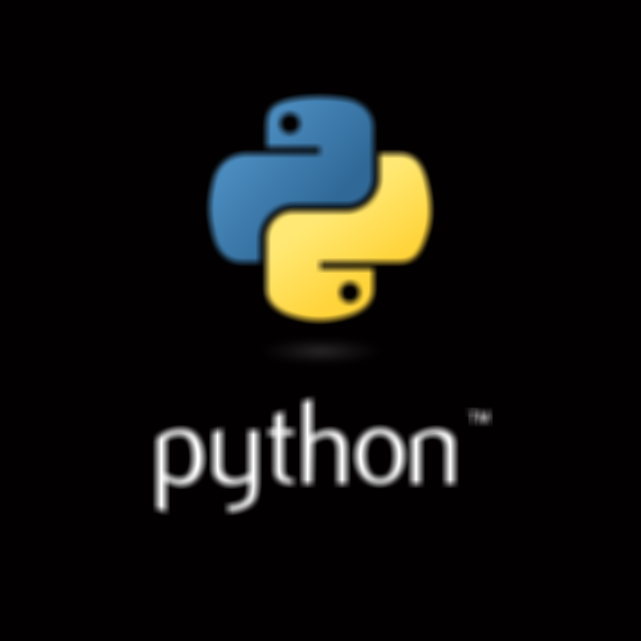

In [44]:
# criando o kernel
kernel_blur = np.ones((9,9), np.float32) / 81

# aplicando o filtro
blurred = cv2.filter2D(image, -1, kernel_blur)

# verificando o resultado
cv2_imshow(blurred)

#### Gaussian Blur

Outra forma de aplicar um *blur*, um embaçado na nossa imagem, seria o ***Gaussian Blur***. Esse filtro é um pouco mais complexo, mas é o tipo de kernel mais usado para processamento de imagens.

Para a criação desse filtro nós usamos a **Função Gaussiana**. Essa função representa a probabilidade de eventos serem centrdos ao redor do valor da média. Além disso, o desvio padrão (𝜎) dessa função controla quão ampla será essa distribuição. Ao tirar amostras de valores dessa função, nós consguirmos coeficientes para uma matriz de filtragem Gaussiana. O efeito de diferentes desvios padrão podem ser observados nas imagens a seguir.

<p align="center"><img src="http://media5.datahacker.rs/2020/05/image5.png" width="50%" ></p>
<center> Imagem 2D</center>

<p align="center"><img src="http://media5.datahacker.rs/2020/04/OIWce-768x576.png" width="50%" ></p>
<center> Imagem 3D</center>

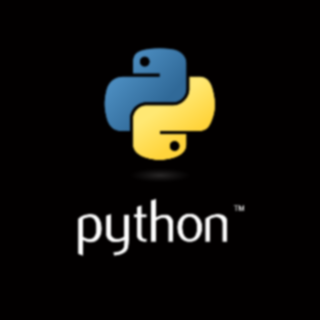

In [45]:
# utilizando o GaussianBlur, que já é implementado no OpenCV
gaussian_blurred = cv2.GaussianBlur(reduced_image, (5, 5), 0)

#visualizando a imagem
cv2_imshow(gaussian_blurred)

#### Motion Blur

Da mesma forma que implementamos o blur acima, também podemos implementar um outro tipo de embaçado, o *Motion Blur*.

O embaçado de movimento (*motion blur*), procura criar um efeito de movimento na imagem.

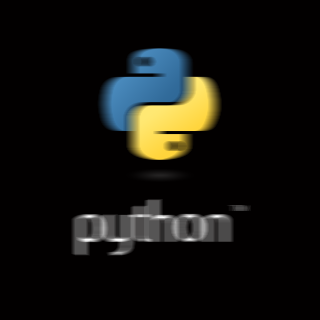

In [46]:
# implementando o filtro
kernel_motion_blur = np.zeros((15,15))
kernel_motion_blur[7, :] = np.ones(15)
kernel_motion_blur = kernel_motion_blur / 15

# aplicando o filtro
motion_blurred = cv2.filter2D(reduced_image, -1, kernel_motion_blur)

# plotando a imagem
cv2_imshow(motion_blurred)

#### Sharpening

O contrário de embaçar a foto, seria deixar ela mais bem definida, "afiar" a imagem. E esse é o conceito do *Sharpening*.

O objetivo do filtro de *sharpening* é melhorar a nitidez, deixar a imagem menos embaçada, usado, normalmente, para melhorar os "limites" (*edges*) dentro da imagem. Existem muitas formas de criar filtros para melhorar as bordas dentro da imagem, uma delas é:

<p align="center"><img src="http://media5.datahacker.rs/2020/04/25-279x300.jpg" width="30%" ></p>

O filtro de *sharpening* tem um centro positivo de 9 e todos os outros pontos possuem o valor -1.

Para esse tipo de filtro vamos usar a função `cv2.filter2D()` que vai processar nossa imagem com um filtro criado por nós, arbitrariamente. Esse filtro é comumente usado para fazer sharpening em imagens coloridas.

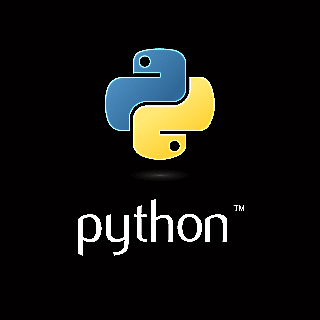

In [47]:
# criando o filtro de sharpening
kernel_sharpening_1 = np.array([[-1, -1, -1],
                                [-1, 9, -1],
                                [-1, -1, -1]])

# implementando o filtro
sharpened = cv2.filter2D(reduced_image, -1, kernel_sharpening_1)

# mostrando a imagem
cv2_imshow(sharpened)

#### Bitwise Operations

Utilizamos Operações Bitwise (a nível de bits) principalmente para aplicar máscaras a imagens.

- Bitwise `AND`: os pixels "brancos" da máscara são substituídos pela imagem "de fundo"
- Bitwise `OR`: os pixels "pretos" da máscara são substituídos pela imagem "de fundo" 

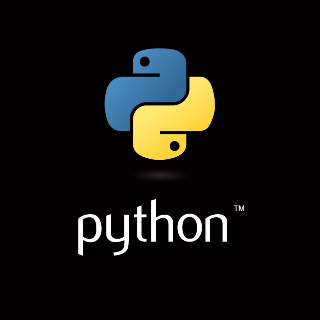

In [48]:
# imagem de fundo
cv2_imshow(reduced_image)

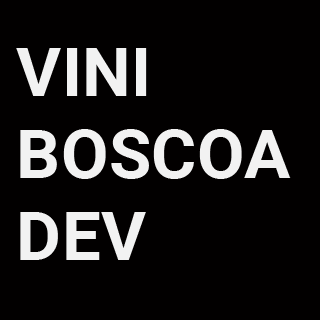

In [52]:
# mascara
mask = cv2.imread('/content/mask.png')
cv2_imshow(mask)

In [53]:
# mostrar dimensões das imagens
print('reduced_image:\t', reduced_image.shape)
print('mask:\t\t', mask.shape)

reduced_image:	 (320, 320, 3)
mask:		 (320, 320, 3)


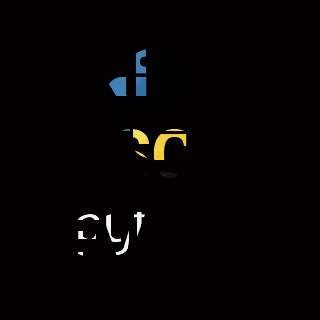

In [54]:
# bitwise AND
masked_and = cv2.bitwise_and(reduced_image, mask)
cv2_imshow(masked_and)

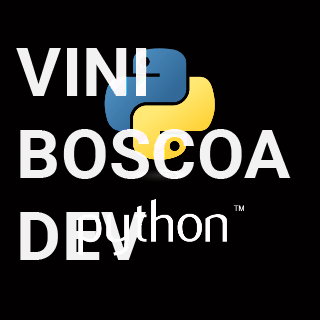

In [55]:
# bitwise OR
masked_or = cv2.bitwise_or(reduced_image, mask)
cv2_imshow(masked_or)

## Referências

Baseado na master class de Visão Computacional da Escola de Data Science (https://sigmoidal.ai)